In [1]:
import pandas as pd
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import scipy.stats as stats
from Bio.Seq import Seq
from Bio.SeqUtils import MeltingTemp as mt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
import scikit_posthocs as sp
from Bio.SeqUtils import GC
import numpy as np
from collections import Counter, OrderedDict
from os import listdir

In [2]:
lsize=14
titlesize=16
axesthickness = 1.5
flierprops = dict(marker='o',markersize=1.5)
boxplot_kwargs = {'widths':0.65, 'vert':True, 'patch_artist':True, 'boxprops':dict(facecolor='#FEFBF3'), 'whis':[5, 95]}
bar_kwargs = {'color':'#C5DEFF', 'edgecolor':'#000000', 'capsize':4, 'linewidth':1.5}
plt.rcParams['axes.linewidth'] = axesthickness
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

### Import list of all experiments

In [3]:
path='C:\\Users\\nimath\\switchdrive\\Institution\\PhD\\01_Experiments\\05_Various\\04_Lukas_Schmidheini\\Nuclease\\1421\\AnalysisFiles\\'

def list_files1(directory):
    return [f for f in listdir(directory) if '1421' in f]

sampledf = pd.DataFrame(columns=['filename','Cell_line','Editor','Replicate'])
filelist = list_files1(path)
sampledf['filename'] = filelist
sampledf['Library'] = sampledf['filename'].apply(lambda x: x.split('_')[1])
sampledf['Editor'] = sampledf['filename'].apply(lambda x: x.split('_')[2])
sampledf['Day'] = sampledf['filename'].apply(lambda x: x.split('_')[-1][1:-4] if not 'ctrl' in x else '')
sampledf['Editor_Day'] = sampledf.apply(lambda x: x.Editor+'_'+x.Day ,axis=1)
sampledf['Replicate'] = sampledf['filename'].apply(lambda x: x.split('_')[-2] if not 'ctrl' in x else x.split('_')[-1][:1])
sampledf['Control'] = sampledf['filename'].apply(lambda x: True if 'ctrl' in x else False)
sampledf['repname'] = sampledf.apply(lambda x: x.Editor+"_"+x.Day+"_"+x.Replicate,axis=1)
#sampledf['Cell_line_Editor'] = sampledf.apply(lambda x: x.Cell_line+"_"+x.Editor,axis=1)
#sampledf['repname'] = sampledf.apply(lambda x: x.Cell_line+"_"+x.Editor+"_"+x.Replicate,axis=1)

In [4]:
templatedf = pd.read_csv('C:\\Users\\nimath\\switchdrive\\Institution\\PhD\\01_Experiments\\05_Various\\04_Lukas_Schmidheini\\Nuclease\\1421\\CjCas9_o1421.csv')

In [5]:
sampledf

,filename,Cell_line,Editor,Replicate,Library,Day,Editor_Day,Control,repname
0,20220903_1421_ctrl_rep_1.csv,NaN,ctrl,1,1421,,ctrl_,True,ctrl__1
1,20220903_1421_ctrl_rep_2.csv,NaN,ctrl,2,1421,,ctrl_,True,ctrl__2
2,20220903_1421_ctrl_rep_3.csv,NaN,ctrl,3,1421,,ctrl_,True,ctrl__3
3,20220903_1421_p551evo_d3d5d7d10_rep_1_d10.csv,NaN,p551evo,1,1421,10,p551evo_10,False,p551evo_10_1
4,20220903_1421_p551evo_d3d5d7d10_rep_1_d3.csv,NaN,p551evo,1,1421,3,p551evo_3,False,p551evo_3_1
5,20220903_1421_p551evo_d3d5d7d10_rep_1_d5.csv,NaN,p551evo,1,1421,5,p551evo_5,False,p551evo_5_1
6,20220903_1421_p551evo_d3d5d7d10_rep_1_d7.csv,NaN,p551evo,1,1421,7,p551evo_7,False,p551evo_7_1
7,20220903_1421_p551evo_d3d5d7d10_rep_2_d10.csv,NaN,p551evo,2,1421,10,p551evo_10,False,p551evo_10_2
8,20220903_1421_p551evo_d3d5d7d10_rep_2_d3.csv,NaN,p551evo,2,1421,3,p551evo_3,False,p551evo_3_2
9,20220903_1421_p551evo_d3d5d7d10_rep_2_d5.csv,NaN,p551evo,2,1421,5,p551evo_5,False,p551evo_5_2


### Calculate control characteristics for each experimental setup

In [6]:
dataframe = pd.read_csv(path+'20220903_1421_p551evo_d3d5d7d10_rep_1_d10.csv')
dataframe

,Unnamed: 0,Identifier,Name,Number,5'Overhang,spacer,Unnamed: 5,scaffold,filler_10n,random_left_6n,...,3'Overhang,Unnamed: 15,Concat:,Length:,spacer_part,Spacer_Length,target,uneditedcount,indelcount,totalreads
0,0,Cj_001,Cj,1,GTGGAAAGGACGAAACACCG,ACCGCCCCTCAATATTGACGCT,22,GTTCTAGTCCCTGAAAAGGGACTAGAATAAAGAGTTTGCGGGACTC...,GATAGTGGCA,GCCGCC,...,AGCTACGACGATGTTTCCCA,NaN,GTGGAAAGGACGAAACACCGACCGCCCCTCAATATTGACGCTGTTC...,200,ACCGCCC,22,ACCGCCCCTCAATATTGACGCT,45,206,251
1,1,Cj_002,Cj,2,GTGGAAAGGACGAAACACCG,GGATAAATATACTCTTAGAGAG,22,GTTCTAGTCCCTGAAAAGGGACTAGAATAAAGAGTTTGCGGGACTC...,TTCCTCCGGG,AAGAAA,...,AGCTACGACGATGTTTCCCA,NaN,GTGGAAAGGACGAAACACCGGGATAAATATACTCTTAGAGAGGTTC...,200,GGATAAA,22,GGATAAATATACTCTTAGAGAG,3,21,24
2,2,Cj_003,Cj,3,GTGGAAAGGACGAAACACCG,AGACATACGTCTCTTACAGACT,22,GTTCTAGTCCCTGAAAAGGGACTAGAATAAAGAGTTTGCGGGACTC...,GGTTATCCTT,AGTCAA,...,AGCTACGACGATGTTTCCCA,NaN,GTGGAAAGGACGAAACACCGAGACATACGTCTCTTACAGACTGTTC...,200,AGACATA,22,AGACATACGTCTCTTACAGACT,50,283,333
3,3,Cj_004,Cj,4,GTGGAAAGGACGAAACACCG,ACAACTCTGTTCCCACGTCTAA,22,GTTCTAGTCCCTGAAAAGGGACTAGAATAAAGAGTTTGCGGGACTC...,GGACCCGCAT,GCTGCT,...,AGCTACGACGATGTTTCCCA,NaN,GTGGAAAGGACGAAACACCGACAACTCTGTTCCCACGTCTAAGTTC...,200,ACAACTC,22,ACAACTCTGTTCCCACGTCTAA,30,182,212
4,4,Cj_005,Cj,5,GTGGAAAGGACGAAACACCG,TGAAAGTTCGCCCGAACCAGGG,22,GTTCTAGTCCCTGAAAAGGGACTAGAATAAAGAGTTTGCGGGACTC...,CCCGCTATAC,TGTCCG,...,AGCTACGACGATGTTTCCCA,NaN,GTGGAAAGGACGAAACACCGTGAAAGTTCGCCCGAACCAGGGGTTC...,200,TGAAAGT,22,TGAAAGTTCGCCCGAACCAGGG,13,160,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Cj_096,Cj,96,GTGGAAAGGACGAAACACCG,TAAGGGTCCTTGAGAGGCCAAT,22,GTTCTAGTCCCTGAAAAGGGACTAGAATAAAGAGTTTGCGGGACTC...,TCATTGACTG,AAGTTG,...,AGCTACGACGATGTTTCCCA,NaN,GTGGAAAGGACGAAACACCGTAAGGGTCCTTGAGAGGCCAATGTTC...,200,TAAGGGT,22,TAAGGGTCCTTGAGAGGCCAAT,47,171,218
96,96,Cj_097,Cj,97,GTGGAAAGGACGAAACACCG,GGTGAGATCACGCCATGTAGGC,22,GTTCTAGTCCCTGAAAAGGGACTAGAATAAAGAGTTTGCGGGACTC...,CCCTTAGTTT,AAGTAA,...,AGCTACGACGATGTTTCCCA,NaN,GTGGAAAGGACGAAACACCGGGTGAGATCACGCCATGTAGGCGTTC...,200,GGTGAGA,22,GGTGAGATCACGCCATGTAGGC,19,97,116
97,97,Cj_098,Cj,98,GTGGAAAGGACGAAACACCG,TTTACGGAATCCCCCTCTGGGG,22,GTTCTAGTCCCTGAAAAGGGACTAGAATAAAGAGTTTGCGGGACTC...,CATCATTCAG,CTCAGC,...,AGCTACGACGATGTTTCCCA,NaN,GTGGAAAGGACGAAACACCGTTTACGGAATCCCCCTCTGGGGGTTC...,200,TTTACGG,22,TTTACGGAATCCCCCTCTGGGG,78,107,185
98,98,Cj_099,Cj,99,GTGGAAAGGACGAAACACCG,CAAGTTGTCCTTTAGATTGTAG,22,GTTCTAGTCCCTGAAAAGGGACTAGAATAAAGAGTTTGCGGGACTC...,ACAAACCTTC,GTTCCT,...,AGCTACGACGATGTTTCCCA,NaN,GTGGAAAGGACGAAACACCGCAAGTTGTCCTTTAGATTGTAGGTTC...,200,CAAGTTG,22,CAAGTTGTCCTTTAGATTGTAG,142,228,370


In [7]:
ctrllist = sampledf[sampledf['Editor'] == 'ctrl']
ctrldf = templatedf.copy()
for index, row in ctrllist.iterrows():
    controlrepdf = pd.read_csv(path+row.filename)
    ctrldf[row.repname+'_totalreads'] = controlrepdf['totalreads']
    controlrepdf['percentageindel'] = controlrepdf.apply(lambda x: (x.indelcount/x.totalreads)*100 ,axis=1)
    controlrepdf['percentageunedited'] = controlrepdf.apply(lambda x: (x.uneditedcount/x.totalreads)*100 ,axis=1)
    ctrldf[row.repname+'_percentageunedited'] = controlrepdf['percentageunedited']
    ctrldf[row.repname+'_percentageindel'] = controlrepdf['percentageindel']
    ctrldf[row.repname+'_uneditedcount'] = controlrepdf['uneditedcount']
    ctrldf[row.repname+'_indelcount'] = controlrepdf['indelcount']

for index, row in ctrllist.iterrows():    
    ctrldf = ctrldf[ctrldf[row.repname+'_totalreads'] > 100]
    ctrldf = ctrldf[ctrldf[row.repname+'_percentageindel'] < 30]

In [8]:
editordaylist = sampledf['Editor_Day'].unique()
editordaylist = [x for x in editordaylist if not 'ctrl' in x]
experimentdict = {}
for editor_day in editordaylist:
    experimentdf = templatedf.copy()
    for index, row in sampledf[sampledf['Editor_Day'] == editor_day].iterrows():
        dataframe = pd.read_csv(path+row.filename)
        dataframename = row.Editor+"_"+row.Day+"_"+row.Replicate
        experimentdf[dataframename+'_totalreads'] = dataframe['totalreads']
        dataframe['percentageindel'] = dataframe.apply(lambda x: (x.indelcount/x.totalreads)*100 ,axis=1)
        dataframe['percentageunedited'] = dataframe.apply(lambda x: (x.uneditedcount/x.totalreads)*100 ,axis=1)
        experimentdf[dataframename+'_percentageunedited'] = dataframe['percentageunedited']
        experimentdf[dataframename+'_percentageindel'] = dataframe['percentageindel']
        experimentdf[dataframename+'_uneditedcount'] = dataframe['uneditedcount']
        experimentdf[dataframename+'_indelcount'] = dataframe['indelcount']
    replicates = list(sampledf[sampledf['Editor_Day'] == editor_day].repname)
    controldf = sampledf[(sampledf['Editor'] == 'ctr')]
    #controlname = controldf['Cell_line_Editor'] + '_' + controldf['Replicate']
    
    ctrluneditedlist = []
    ctrlindellist = []
    lib = "1421"
    for index, row in ctrllist.iterrows():
        ctrluneditedlist.append(row.repname+'_percentageunedited')
        ctrlindellist.append(row.repname+'_percentageindel')
        
    experimentdf[lib+'_ctr'+'_percentageunedited'] = ctrldf[ctrluneditedlist].mean(axis=1)
    experimentdf[lib+'_ctr'+'_percentageindel'] = ctrldf[ctrlindellist].mean(axis=1)

    cutoff = 100
    initialtemplen = len(experimentdf)

    for replicate in replicates:
        experimentdf = experimentdf[experimentdf[replicate+'_totalreads']>cutoff]

    experimentdict[editor_day] = experimentdf

### Calculate editing characteristics for all experimental setups
Also clip editing levels to be between 0-100.

In [9]:
sampledf_woctr = sampledf[sampledf['Editor'] != 'ctrl']

In [10]:
editordaydf = sampledf_woctr.copy()
editordaydf = editordaydf[editordaydf['Replicate'] == "1"]
editordaydf = editordaydf.set_index('Editor_Day')

cols = ['Editor', 'Library', 'Day']
editordaydf = editordaydf[cols]
editordaydf

,Editor,Library,Day
Editor_Day,,,
p551evo_10,p551evo,1421,10
p551evo_3,p551evo,1421,3
p551evo_5,p551evo,1421,5
p551evo_7,p551evo,1421,7
p551wt_10,p551wt,1421,10
p551wt_3,p551wt,1421,3
p551wt_5,p551wt,1421,5
p551wt_7,p551wt,1421,7
p613_10,p613,1421,10


In [11]:
for editor_day in experimentdict:
    print(editor_day)
    replicatelist = list(sampledf_woctr[sampledf_woctr['Editor_Day'] == editor_day]['repname'])
    ctrname = lib+'_ctr'
    
    for replicate in replicatelist:
        print(replicate)
        repnr = replicate.split('_')[-1]
        experimentdict[editor_day][replicate+'_percentageindel_corrected_individual'] = experimentdict[editor_day].apply(lambda x: ((x[replicate+'_percentageindel']-x[ctrname+'_percentageindel'])/((100-x[ctrname+'_percentageindel'])/100)),axis=1)
        editordaydf.at[editor_day,repnr +'_meanindel'] = None
        editordaydf.at[editor_day,repnr +'_meanindel'] = experimentdict[editor_day][[replicate +'_percentageindel_corrected_individual']].mean()
        
    allreps = []
    for index,row in sampledf_woctr[sampledf_woctr['Editor_Day'] == editor_day].iterrows():
        rep = row.Editor_Day+'_'+row.Replicate
        allreps.append(rep)
        
    print(allreps)    
    experimentdict[editor_day][editor_day+'_averageindel'] = experimentdict[editor_day][[x +'_percentageindel_corrected_individual' for x in allreps]].mean(axis=1)
    
       
    # Clip editing rates to be between 0 and 100
    experimentdict[editor_day][editor_day+'_averageindel'] = experimentdict[editor_day][editor_day+'_averageindel'].clip(0,100)
    
    experimentdict[editor_day] = experimentdict[editor_day].dropna(subset=[editor_day+'_averageindel'])
    
    replist = ['1_meanindel','2_meanindel','3_meanindel']
    
    
    
    
    editordaydf.at[editor_day,'numberofvariants'] = len(experimentdict[editor_day])
    editordaydf.at[editor_day,'meanindel'] = experimentdict[editor_day][editor_day+'_averageindel'].mean()
    editordaydf.at[editor_day,'standarddeviation'] = experimentdict[editor_day][editor_day+'_averageindel'].std()
    experimentdict[editor_day].to_csv('.//1421//AnalysisFiles//summary//20220912_'+editor_day+'_analysis_dataframe.csv')

p551evo_10
p551evo_10_1
p551evo_10_2
p551evo_10_3
['p551evo_10_1', 'p551evo_10_2', 'p551evo_10_3']
p551evo_3
p551evo_3_1
p551evo_3_2
p551evo_3_3
['p551evo_3_1', 'p551evo_3_2', 'p551evo_3_3']
p551evo_5
p551evo_5_1
p551evo_5_2
p551evo_5_3
['p551evo_5_1', 'p551evo_5_2', 'p551evo_5_3']
p551evo_7
p551evo_7_1
p551evo_7_2
p551evo_7_3
['p551evo_7_1', 'p551evo_7_2', 'p551evo_7_3']
p551wt_10
p551wt_10_1
p551wt_10_2
p551wt_10_3
['p551wt_10_1', 'p551wt_10_2', 'p551wt_10_3']
p551wt_3
p551wt_3_1
p551wt_3_2
p551wt_3_3
['p551wt_3_1', 'p551wt_3_2', 'p551wt_3_3']
p551wt_5
p551wt_5_1
p551wt_5_2
p551wt_5_3
['p551wt_5_1', 'p551wt_5_2', 'p551wt_5_3']
p551wt_7
p551wt_7_1
p551wt_7_2
p551wt_7_3
['p551wt_7_1', 'p551wt_7_2', 'p551wt_7_3']
p613_10
p613_10_1
p613_10_2
p613_10_3
['p613_10_1', 'p613_10_2', 'p613_10_3']
p613_3
p613_3_1
p613_3_2
p613_3_3
['p613_3_1', 'p613_3_2', 'p613_3_3']
p613_5
p613_5_1
p613_5_2
p613_5_3
['p613_5_1', 'p613_5_2', 'p613_5_3']
p613_7
p613_7_1
p613_7_2
p613_7_3
['p613_7_1', 'p613_7_2',

In [12]:
for index, row in editordaydf.iterrows():
    editordaydf.at[index,'replicate_meanindel'] = (row['1_meanindel'] + row['2_meanindel'] + row['3_meanindel']) / 3
    editordaydf.at[index,'replicate_std'] = np.std([row['1_meanindel'],row['2_meanindel'],row['3_meanindel']])

In [13]:
editordaydf['Day'] = editordaydf['Day'].apply(lambda x: int(x))
editordaydf = editordaydf.sort_values('Day')
editordaydf = editordaydf.sort_values('Editor')
editordaydf['filename'] = editordaydf.apply(lambda x: '20220912_'+x.Editor+'_'+str(x.Day)+'_analysis_dataframe.csv',axis=1)
editordaydf.to_csv('.//1421//AnalysisFiles//summary//20220912_1421_summary_mean_std.csv')
editordaydf

PermissionError: [Errno 13] Permission denied: './/1421//AnalysisFiles//summary//20220912_1421_summary_mean_std.csv'

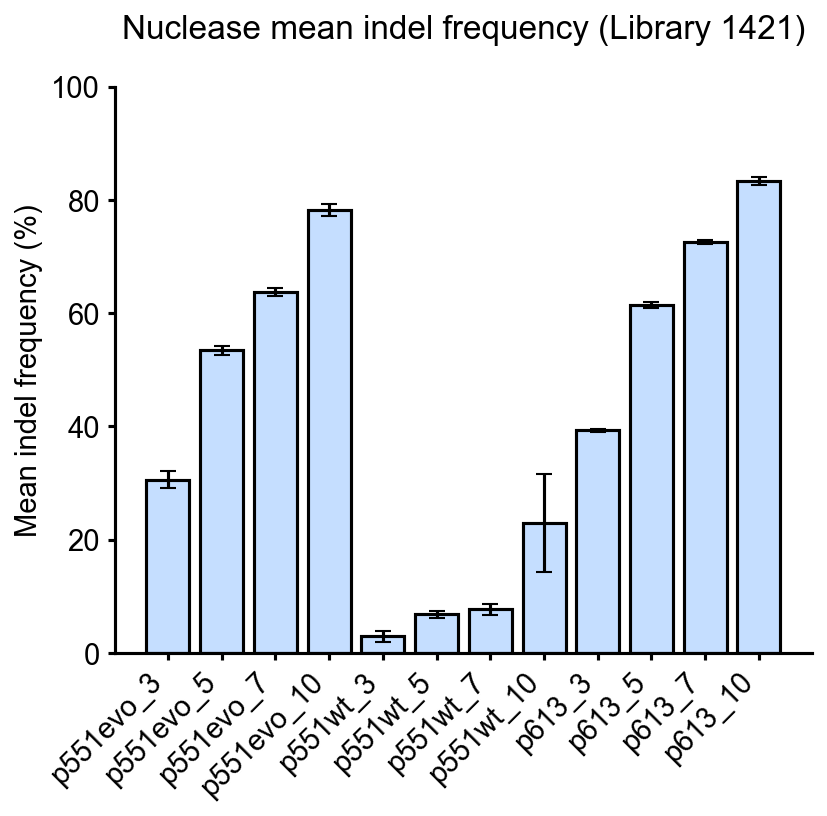

In [14]:
conditionlist = list(editordaydf.index)
meanlist = list(editordaydf.replicate_meanindel)
stdlist = list(editordaydf.replicate_std)

fig1, ax1 = plt.subplots(figsize = (6,5),dpi=150,sharex=True)
ax1.set_title('Nuclease mean indel frequency (Library 1421)\n', fontsize=titlesize)
ax1.bar(conditionlist,meanlist,yerr=stdlist, **bar_kwargs)
ax1.set_xticks(range(len(conditionlist)))
ax1.set_xticklabels(conditionlist, ha="right")
#ax1.set_yticks(np.linspace(0,1,11))
ax1.set_ylabel('Mean indel frequency (%)', fontsize=lsize)
ax1.tick_params(axis='x', labelsize= lsize, width=1.5, rotation=45)
ax1.tick_params(axis='y', labelsize= lsize, width=1.5)
ax1.set_ylim(0,100)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
figurepath = 'C:\\Users\\nimath\\switchdrive\\Institution\\PhD\\01_Experiments\\05_Various\\04_Lukas_Schmidheini\\Nuclease\\1421\\'
#plt.savefig(figurepath+'Nuclease_1421_meanefficiency.pdf', format='pdf',
#        transparent=True,bbox_inches='tight')

### Filter libraries 1421, 1422 and 1423 and Nme Library to contain only spacers which occur in all three libraries for all editors

In [92]:
editordaydf1422 = pd.read_csv('.//1422//AnalysisFiles//summary//20220912_1422_summary_mean_std.csv')
editordaydf1423 = pd.read_csv('.//1423//AnalysisFiles//summary//20220912_1423_summary_mean_std.csv')

In [93]:
editordaydf_all = editordaydf.append(editordaydf1422).append(editordaydf1423)

In [94]:
editordaydf_all = editordaydf_all.reset_index()

cols = ['Editor', 'Library', 'Day', '1_meanindel', '2_meanindel', '3_meanindel',
       'numberofvariants', 'meanindel', 'standarddeviation',
       'replicate_meanindel', 'replicate_std']

filtereditordaydf = pd.DataFrame(columns=cols)

for day in [3,5,7,10]:
    numberlist_temp = []
    for index, row in editordaydf_all[editordaydf_all['Day'] == day].iterrows():
        tempdf = pd.read_csv('.//'+str(row.Library)+'//AnalysisFiles//summary//'+row.filename)
        numberlist_temp.append(list(tempdf['Number']))

    numberlist_unique = set.intersection(*map(set,numberlist_temp))
    
    for index, row in editordaydf_all[editordaydf_all['Day'] == day].iterrows():
        tempdf = pd.read_csv('.//'+str(row.Library)+'//AnalysisFiles//summary//'+row.filename)
        tempdf = tempdf[tempdf['Number'].isin(numberlist_unique)]
        tempdf.to_csv('.//'+str(row.Library)+'//AnalysisFiles//summary//20221004_'+row.Editor+'_'+str(row.Day)+'_filtered_analysis_dataframe.csv')
        filtereditordaydf.at[index, 'Editor'] = row.Editor
        filtereditordaydf.at[index, 'Library'] = row.Library
        filtereditordaydf.at[index, 'Day'] = row.Day
        filtereditordaydf.at[index, '1_meanindel'] = tempdf[row.Editor+'_'+str(row.Day)+'_1_percentageindel_corrected_individual'].mean()
        filtereditordaydf.at[index, '2_meanindel'] = tempdf[row.Editor+'_'+str(row.Day)+'_2_percentageindel_corrected_individual'].mean()
        filtereditordaydf.at[index, '3_meanindel'] = tempdf[row.Editor+'_'+str(row.Day)+'_3_percentageindel_corrected_individual'].mean()
        filtereditordaydf.at[index,'numberofvariants'] = len(tempdf)
        filtereditordaydf.at[index,'meanindel'] = tempdf[row.Editor+'_'+str(row.Day)+'_averageindel'].mean()
        filtereditordaydf.at[index,'standarddeviation'] = tempdf[row.Editor+'_'+str(row.Day)+'_averageindel'].std()
        filtereditordaydf.at[index,'replicate_meanindel'] = tempdf[row.Editor+'_'+str(row.Day)+'_averageindel'].mean()
        filtereditordaydf.at[index,'replicate_std'] = tempdf[row.Editor+'_'+str(row.Day)+'_averageindel'].std()
        
for index, row in filtereditordaydf.iterrows():        
    filtereditordaydf.at[index,'replicate_meanindel'] = (row['1_meanindel'] + row['2_meanindel'] + row['3_meanindel']) / 3
    filtereditordaydf.at[index,'replicate_std'] = np.std([row['1_meanindel'],row['2_meanindel'],row['3_meanindel']])
    
    
filtereditordaydf.to_csv('20220927_Nuclease_Summary_MeanAndMore.csv', index=False)

In [95]:
day10df = editordaydf_all[editordaydf_all['Day'] == 10].set_index('Editor')
day10df
evonumbers = [day10df.at['p551evo','1_meanindel'],day10df.at['p551evo','2_meanindel'],day10df.at['p551evo','3_meanindel']]
spnumbers = [day10df.at['p614','1_meanindel'],day10df.at['p614','2_meanindel'],day10df.at['p614','3_meanindel']]


In [96]:
from scipy import stats
print(stats.mannwhitneyu(evonumbers,spnumbers))

MannwhitneyuResult(statistic=0.0, pvalue=0.04042779918502612)


In [97]:
print(stats.ttest_ind(evonumbers,spnumbers))

Ttest_indResult(statistic=-13.306523362292804, pvalue=0.00018438073530696353)


In [98]:
print(evonumbers)
print(spnumbers)

[77.54613955103291, 79.61489086293675, 77.30738730412244]
[87.91553142654003, 87.92010697914121, 87.88264438720098]


In [99]:
editordaydf_all = editordaydf_all.reset_index()

cols = ['Editor', 'Library', 'Day', '1_meanindel', '2_meanindel', '3_meanindel',
       'numberofvariants', 'meanindel', 'standarddeviation',
       'replicate_meanindel', 'replicate_std']

filtereditordaydf = pd.DataFrame(columns=cols)

editorlist = list(editordaydf_all[editordaydf_all['Day'] == 10].Editor)

boxplot_averagedict = {}
boxplot_individualdict = {}
for editor in editorlist:
    boxplot_averagedict[editor] = []
    boxplot_individualdict[editor] = []


for day in [10]:
    numberlist_temp = []
    for index, row in editordaydf_all[editordaydf_all['Day'] == day].iterrows():
        tempdf = pd.read_csv('.//'+str(row.Library)+'//AnalysisFiles//summary//'+row.filename)
        numberlist_temp.append(list(tempdf['Number']))

    numberlist_unique = set.intersection(*map(set,numberlist_temp))
    
    for index, row in editordaydf_all[editordaydf_all['Day'] == day].iterrows():
        tempdf = pd.read_csv('.//'+str(row.Library)+'//AnalysisFiles//summary//'+row.filename)
        tempdf = tempdf[tempdf['Number'].isin(numberlist_unique)]
        
        # Clip all values from 0-100
        tempdf[row.Editor+'_'+str(row.Day)+'_averageindel'] = tempdf[row.Editor+'_'+str(row.Day)+'_averageindel'].clip(0,100)
        tempdf[row.Editor+'_'+str(row.Day)+'_1_percentageindel_corrected_individual'] = tempdf[row.Editor+'_'+str(row.Day)+'_1_percentageindel_corrected_individual'].clip(0,100)
        tempdf[row.Editor+'_'+str(row.Day)+'_2_percentageindel_corrected_individual'] = tempdf[row.Editor+'_'+str(row.Day)+'_2_percentageindel_corrected_individual'].clip(0,100)
        tempdf[row.Editor+'_'+str(row.Day)+'_3_percentageindel_corrected_individual'] = tempdf[row.Editor+'_'+str(row.Day)+'_3_percentageindel_corrected_individual'].clip(0,100)
        
        boxplot_averagedict[row.Editor] += list(tempdf[row.Editor+'_'+str(row.Day)+'_averageindel'])
        boxplot_individualdict[row.Editor] += list(tempdf[row.Editor+'_'+str(row.Day)+'_1_percentageindel_corrected_individual'])
        boxplot_individualdict[row.Editor] += list(tempdf[row.Editor+'_'+str(row.Day)+'_2_percentageindel_corrected_individual'])
        boxplot_individualdict[row.Editor] += list(tempdf[row.Editor+'_'+str(row.Day)+'_3_percentageindel_corrected_individual'])
        
boxplot_averagedf = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in boxplot_averagedict.items() ]))
boxplot_individualdf = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in boxplot_individualdict.items() ]))

boxplot_averagedf.to_csv('figures/20221020_Nuclease_Summary_Averageofreplicates_allgRNA_datapoints.csv')
boxplot_individualdf.to_csv('figures/20221020_Nuclease_Summary_individualreplicates_allgRNA_datapoints.csv')

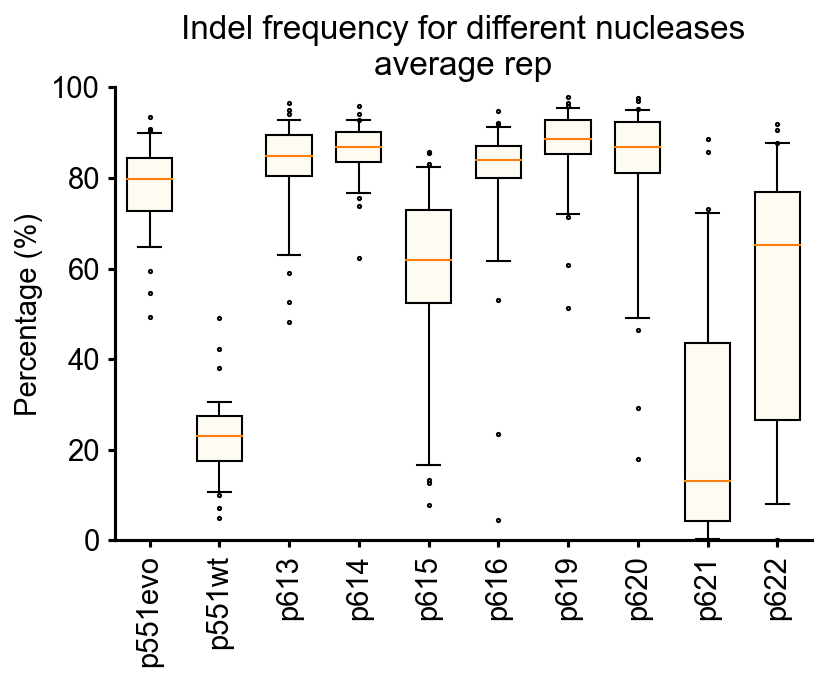

In [100]:
allnucleases = editorlist
editinglist = []
for motif in list(allnucleases):
    editinglist.append(boxplot_averagedf[motif])
fig11, ax11 = plt.subplots(dpi=150)
ax11.set_title('Indel frequency for different nucleases\naverage rep', fontsize=titlesize)
ax11.boxplot(editinglist,**boxplot_kwargs, flierprops = flierprops)
ax11.set_xticklabels(allnucleases)
ax11.set_ylabel('Percentage (%)', fontsize=lsize)
ax11.tick_params(axis='x', labelsize= lsize, width=1.5)
ax11.tick_params(axis='y', labelsize= lsize, width=1.5)
ax11.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax11.tick_params(axis='x', labelrotation=90)
ax11.set_ylim(0,100)
figurepath = 'figures/'
plt.savefig(figurepath+'20221020_allnucleases_comparison_averagerep_boxplot.pdf', format='pdf',transparent=True,bbox_inches='tight')
plt.show()

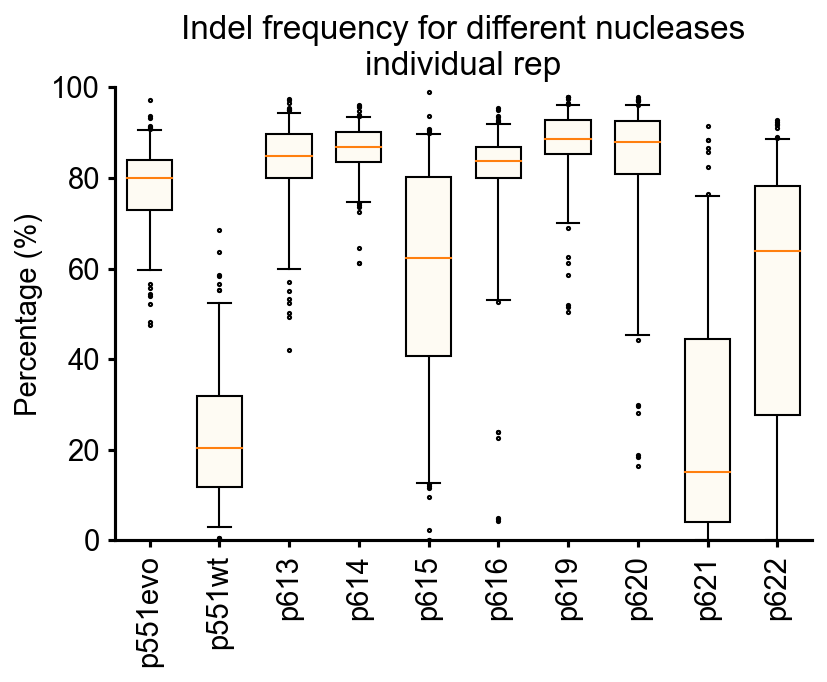

In [101]:
allnucleases = editorlist
editinglist = []
for motif in list(allnucleases):
    editinglist.append(boxplot_individualdf[motif])
fig11, ax11 = plt.subplots(dpi=150)
ax11.set_title('Indel frequency for different nucleases\nindividual rep', fontsize=titlesize)
ax11.boxplot(editinglist,**boxplot_kwargs, flierprops = flierprops)
ax11.set_xticklabels(allnucleases)
ax11.set_ylabel('Percentage (%)', fontsize=lsize)
ax11.tick_params(axis='x', labelsize= lsize, width=1.5)
ax11.tick_params(axis='y', labelsize= lsize, width=1.5)
ax11.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax11.tick_params(axis='x', labelrotation=90)
ax11.set_ylim(0,100)
figurepath = 'figures/'
plt.savefig(figurepath+'20221020_allnucleases_comparison_individualrep_boxplot.pdf', format='pdf',transparent=True,bbox_inches='tight')
plt.show()

## Create supplementary file for nucleases

In [4]:
writer = pd.ExcelWriter('SupplementaryTable4_CjCas_Nuclease_Libraries.xlsx')

librarylist = ["1421","1422","1423"]
for lib in librarylist:
    nucleasepath = lib+"/AnalysisFiles/summary/"
    def nuc_files(directory):
        return [f for f in listdir(directory) if ('10_analysis_dataframe.csv' in f)]
    nuclist = nuc_files(nucleasepath)
    for file in nuclist:
        editorname = file.split('_')[1]
        tempdf = pd.read_csv(nucleasepath+file)
        collist = list(tempdf.columns)
        unnamedcols = [x for x in collist if 'Unnamed' in x]
        tempdf = tempdf.drop(columns=unnamedcols)
        tempdf.to_excel(writer, sheet_name=editorname, index=False)
    
writer.save()